Gradient at theta0: [-3.91783531 -2.48398404 -0.70581046]
=== Optimization Comparison ===

Vanilla Gradient Descent:
  Iterations to converge: 682
  Final distance to target (m): 0.009978
  Final loss: 4.978350e-05
  Final joint angles (degrees): [ 30.08766456 102.32983005  49.56716801]
  End-effector path length (m): 6.935475

Gradient Descent with Momentum:
  Iterations to converge: 89
  Final distance to target (m): 0.004838
  Final loss: 1.170405e-05
  Final joint angles (degrees): [ 24.98348912 109.95272884  40.8386863 ]
  End-effector path length (m): 14.002363



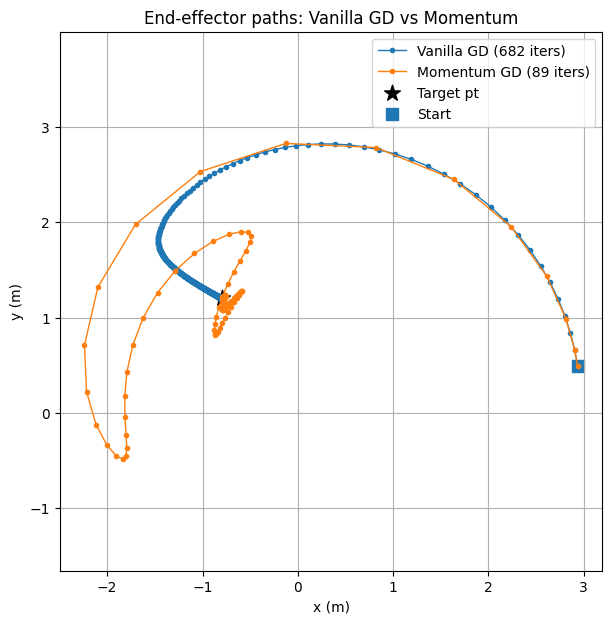

In [1]:
import numpy as np

pt = np.array([-0.8, 1.2])          # target position
theta0 = np.array([0.2, 0.1, -0.3]) # initial angles (radians)

theta = theta0.copy()
# forward kinematics: returns (x,y)
#Theta is just a 3x1 vector of angles
#And this eventually becomes some value
# so that the end effector reaches pt

def p(theta):
    t1, t2, t3 = theta
    s1 = t1
    s12 = t1 + t2
    s123 = t1 + t2 + t3
    x = np.cos(s1) + np.cos(s12) + np.cos(s123)
    y = np.sin(s1) + np.sin(s12) + np.sin(s123)
    return np.array([x, y])

#Loss Function, L(theta):
def loss(theta):
    diff = p(theta) - pt
    return 0.5 * np.dot(diff,diff)

#Euclidean distance from target point to end effector(Why do we need this?)
def distance_to_target(theta):
    return np.linalg.norm(p(theta)-pt)

#So, gradient descent needs del(L(Theta))
#Basically, we need a vector, del(L)/del(theta1,2,3...)
#And we use the first principle as an approx for the deriv.
def grad(theta,h=1e-5):
    grad = np.zeros_like(theta) #Create zero vector
    for i in range(0,3):
        theta_plus_h = np.copy(theta)
        theta_minus_h = np.copy(theta)

        #Perturb the ith element:
        theta_plus_h[i] += h
        theta_minus_h[i] -=h

        #Compute loss at these values of theta+-
        L_plus=loss(theta_plus_h)
        L_minus=loss(theta_minus_h)

        # central difference
        grad[i] = (L_plus - L_minus) / (2 * h)

    return grad
#Sanity Check:
g = grad(theta)
print("Gradient at theta0:", g)

#Now, implement gradient descent:
#Theta at k+1 = thetak + grad(thetak)
alpha = 0.01
max_iters = 20000
path_gd = []  #store the (x, y) positions for plotting later
iters = 0
#Store initial posiion in path:
path_gd.append(p(theta))
#Gradient Descent loop
while distance_to_target(theta) > 0.01 and iters < max_iters:
    g = grad(theta)
    theta = theta - alpha * g #Our Update Rule
    #If we added + sign, we get gradient ascent
    #We would be maximising our loss function
    #But, we want to minimise our loss! so - sign!
    path_gd.append(p(theta))
    iters+=1
#Convert path to array:
final_theta_gd = theta.copy()
final_dist_gd = distance_to_target(final_theta_gd)
final_loss_gd = loss(final_theta_gd)
final_angles_deg_gd = np.degrees(final_theta_gd)
path_gd = np.array(path_gd)

#Now, running gradient descent with momentum(part d)
alpha = 0.01
beta = 0.9
theta_m=theta0.copy()
v = np.zeros_like(theta_m) #Initial velocity set to 0,0,0
path_momentum = []
path_momentum.append(p(theta_m))
#Now, same thing:
iters = 0
while distance_to_target(theta_m) > 0.01 and iters < max_iters:
    g = grad(theta_m)
    v = beta * v + alpha * g
    theta_m = theta_m - v
    path_momentum.append(p(theta_m))
    iters+=1
final_theta_gd_momentum = theta_m.copy()
final_dist_gd_momentum = distance_to_target(final_theta_gd_momentum)
final_loss_gd_momentum = loss(final_theta_gd_momentum)
final_angles_deg_gd_momentum = np.degrees(final_theta_gd_momentum)
path_momentum = np.array(path_momentum)

#compute iterations from path length
iters_gd = len(path_gd) - 1
iters_mom = len(path_momentum) - 1

#final angles in degrees Already Computed
final_angles_deg_gd = np.degrees(final_theta_gd)
final_angles_deg_mom = np.degrees(final_theta_gd_momentum)

#For Vanilla gradient descent
length_gd = 0
for i in range(len(path_gd)-1):
    length_gd += np.linalg.norm(path_gd[i+1] - path_gd[i], ord=2)

# For momentum gradient descent
length_mom = 0
for i in range(len(path_momentum)-1):
    length_mom += np.linalg.norm(path_momentum[i+1] - path_momentum[i], ord=2)

import matplotlib.pyplot as plt 
#Summary table:
print("=== Optimization Comparison ===\n")
print("Vanilla Gradient Descent:")
print(f"  Iterations to converge: {iters_gd}")
print(f"  Final distance to target (m): {final_dist_gd:.6f}")
print(f"  Final loss: {final_loss_gd:.6e}")
print(f"  Final joint angles (degrees): {final_angles_deg_gd}")
print(f"  End-effector path length (m): {length_gd:.6f}")
print()

print("Gradient Descent with Momentum:")
print(f"  Iterations to converge: {iters_mom}")
print(f"  Final distance to target (m): {final_dist_gd_momentum:.6f}")
print(f"  Final loss: {final_loss_gd_momentum:.6e}")
print(f"  Final joint angles (degrees): {final_angles_deg_mom}")
print(f"  End-effector path length (m): {length_mom:.6f}")
print()

#Plot both paths on same figure
plt.figure(figsize=(7,7))
plt.plot(path_gd[:,0], path_gd[:,1], '-o', markersize=3, linewidth=1, label=f'Vanilla GD ({iters_gd} iters)')
plt.plot(path_momentum[:,0], path_momentum[:,1], '-o', markersize=3, linewidth=1, label=f'Momentum GD ({iters_mom} iters)')
plt.scatter([pt[0]], [pt[1]], color='k', marker='*', s=140, label='Target pt')
plt.scatter(path_gd[0,0], path_gd[0,1], color='tab:blue', marker='s', s=80, label='Start')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('End-effector paths: Vanilla GD vs Momentum')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

